In [131]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
%matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


Using matplotlib backend: module://matplotlib_inline.backend_inline


In [132]:
data = pd.read_csv('Data/For_EDA_dataset.csv', index_col='property_id')

In [133]:
data

,property_type,price,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,date_added,agency,agent,Area_in_Marla
property_id,,,,,,,,,,,,,,
0,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,For Sale,2,2019-02-04,Self,Self,4.0
1,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,For Sale,3,2019-05-04,Self,Self,5.6
2,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,For Sale,5,2019-07-17,Self,Self,8.0
3,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,For Sale,4,2019-04-05,Self,Self,40.0
4,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,For Sale,3,2019-07-10,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168441,House,26500000,Gadap Town,Karachi,Sindh,25.029909,67.137192,0,For Sale,6,2019-07-18,Al Shahab Enterprises,Shahmir,9.6
168442,House,12500000,Gadap Town,Karachi,Sindh,25.017951,67.136393,0,For Sale,3,2019-07-18,Al Shahab Enterprises,Shahmir,8.0
168443,House,27000000,Gadap Town,Karachi,Sindh,25.015384,67.116330,0,For Sale,6,2019-07-18,Al Shahab Enterprises,Shahmir,9.6


In [134]:
data.isna().sum()

property_type    0
price            0
location         0
city             0
province_name    0
latitude         0
longitude        0
baths            0
purpose          0
bedrooms         0
date_added       0
agency           0
agent            0
Area_in_Marla    0
dtype: int64

In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 153430 entries, 0 to 168445
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   property_type  153430 non-null  object 
 1   price          153430 non-null  int64  
 2   location       153430 non-null  object 
 3   city           153430 non-null  object 
 4   province_name  153430 non-null  object 
 5   latitude       153430 non-null  float64
 6   longitude      153430 non-null  float64
 7   baths          153430 non-null  int64  
 8   purpose        153430 non-null  object 
 9   bedrooms       153430 non-null  int64  
 10  date_added     153430 non-null  object 
 11  agency         153430 non-null  object 
 12  agent          153430 non-null  object 
 13  Area_in_Marla  153430 non-null  float64
dtypes: float64(3), int64(3), object(8)
memory usage: 17.6+ MB


In [136]:
data['property_type'].value_counts()

property_type
House            96643
Flat             34309
Upper Portion    12515
Lower Portion     8293
Room               663
Farm House         626
Penthouse          381
Name: count, dtype: int64

In [137]:
data['city'].value_counts()


city
Karachi       54650
Lahore        38492
Islamabad     34456
Rawalpindi    18940
Faisalabad     6892
Name: count, dtype: int64

In [138]:
data['purpose'].value_counts()

purpose
For Sale    110247
For Rent     43183
Name: count, dtype: int64

In [139]:
oh = OneHotEncoder(drop='first', dtype=np.int64, handle_unknown='ignore')
en_cols = ['property_type','city', 'purpose']

In [140]:
end = oh.fit_transform(data[en_cols]).toarray()



In [141]:
en_cols_name = oh.get_feature_names_out(en_cols)

en_data = pd.DataFrame(end, columns=en_cols_name, index=data.index)
en_data

,property_type_Flat,property_type_House,property_type_Lower Portion,property_type_Penthouse,property_type_Room,property_type_Upper Portion,city_Islamabad,city_Karachi,city_Lahore,city_Rawalpindi,purpose_For Sale
property_id,,,,,,,,,,,
0,1,0,0,0,0,0,1,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,1
2,0,1,0,0,0,0,1,0,0,0,1
3,0,1,0,0,0,0,1,0,0,0,1
4,0,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
168441,0,1,0,0,0,0,0,1,0,0,1
168442,0,1,0,0,0,0,0,1,0,0,1
168443,0,1,0,0,0,0,0,1,0,0,1


In [142]:
cols = ['price', 'baths', 'bedrooms', 'Area_in_Marla']
df = pd.concat([data[cols], en_data], axis=1)


In [143]:
df.sample(10)

,price,baths,bedrooms,Area_in_Marla,property_type_Flat,property_type_House,property_type_Lower Portion,property_type_Penthouse,property_type_Room,property_type_Upper Portion,city_Islamabad,city_Karachi,city_Lahore,city_Rawalpindi,purpose_For Sale
property_id,,,,,,,,,,,,,,,
34382,31500000,6,6,10.0,0,1,0,0,0,0,1,0,0,0,1
4174,25000,1,2,3.6,1,0,0,0,0,0,0,1,0,0,0
126834,10000000,4,3,5.0,0,1,0,0,0,0,0,0,0,1,1
33296,29900000,5,4,10.0,0,1,0,0,0,0,0,0,1,0,1
150916,8500000,0,0,5.0,0,1,0,0,0,0,0,0,0,0,1
13237,4100000,2,4,4.0,1,0,0,0,0,0,0,1,0,0,1
28691,13000000,7,5,8.0,0,1,0,0,0,0,1,0,0,0,1
59261,14500000,3,3,6.1,0,1,0,0,0,0,0,1,0,0,1
128720,113500000,0,0,20.0,0,1,0,0,0,0,0,1,0,0,1


In [144]:
df[df['baths'] > 15]

,price,baths,bedrooms,Area_in_Marla,property_type_Flat,property_type_House,property_type_Lower Portion,property_type_Penthouse,property_type_Room,property_type_Upper Portion,city_Islamabad,city_Karachi,city_Lahore,city_Rawalpindi,purpose_For Sale
property_id,,,,,,,,,,,,,,,
129605,15000000,403,6,5.0,0,1,0,0,0,0,0,0,0,1,1


In [145]:
df[df['bedrooms'] >= 20]

,price,baths,bedrooms,Area_in_Marla,property_type_Flat,property_type_House,property_type_Lower Portion,property_type_Penthouse,property_type_Room,property_type_Upper Portion,city_Islamabad,city_Karachi,city_Lahore,city_Rawalpindi,purpose_For Sale
property_id,,,,,,,,,,,,,,,
120075,1300000,0,28,40.0,0,1,0,0,0,0,0,0,0,1,0
129557,960000000,0,25,160.0,0,1,0,0,0,0,0,0,1,0,1
130132,300000,0,21,24.0,0,1,0,0,0,0,1,0,0,0,0
139738,1300000,0,28,40.0,0,1,0,0,0,0,0,0,0,1,0
140891,2500000,0,68,132.0,0,1,0,0,0,0,0,1,0,0,0
144418,550000,0,25,60.0,0,1,0,0,0,0,0,1,0,0,0
144837,80000000,0,27,60.0,0,1,0,0,0,0,0,0,0,1,1
152009,900000,0,25,60.0,0,1,0,0,0,0,0,1,0,0,0
164716,1300000,0,28,40.0,0,1,0,0,0,0,0,0,0,1,0


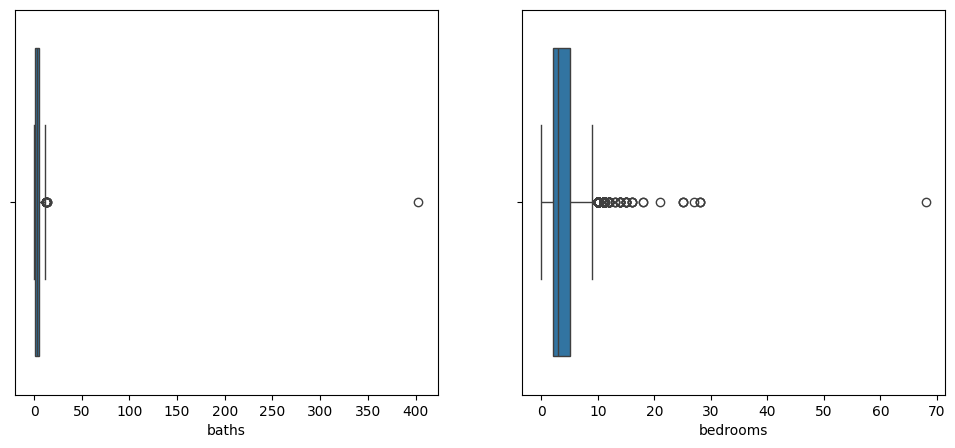

In [146]:

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['baths'])


plt.subplot(1, 2, 2)
sns.boxplot(x=df['bedrooms'])


plt.show()

In [147]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

In [148]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [149]:
df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound) & (df['baths'] <= 10) & (df['bedrooms'] <= 20) ]
df['price'] = np.log1p(df['price'])

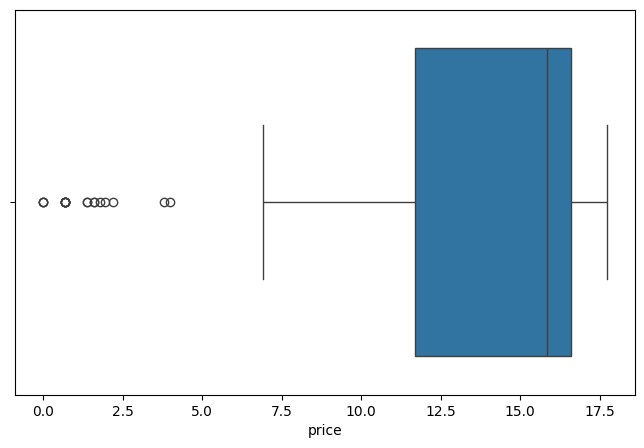

In [150]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['price'])
plt.show()

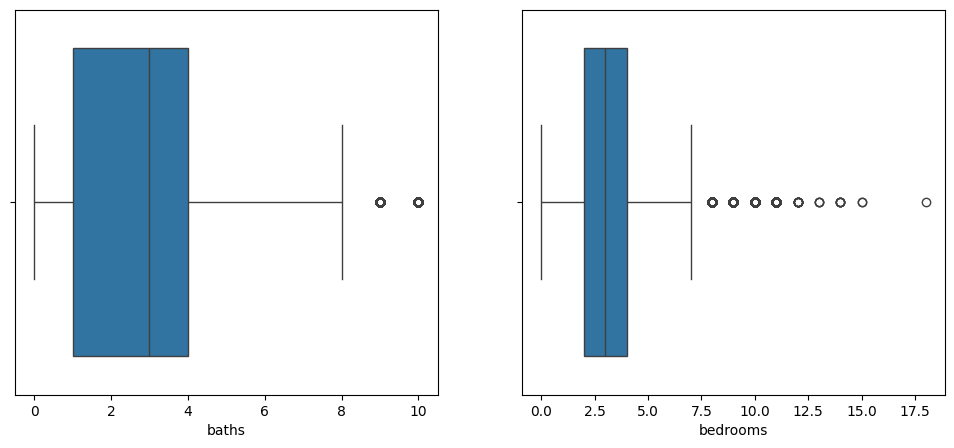

In [151]:

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['baths'])

plt.subplot(1, 2, 2)
sns.boxplot(x=df['bedrooms'])

plt.show()

In [152]:
x_data = df.iloc[:, 1:]
y_data = df['price']

In [153]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=50)
x_test

,baths,bedrooms,Area_in_Marla,property_type_Flat,property_type_House,property_type_Lower Portion,property_type_Penthouse,property_type_Room,property_type_Upper Portion,city_Islamabad,city_Karachi,city_Lahore,city_Rawalpindi,purpose_For Sale
property_id,,,,,,,,,,,,,,
155962,3,3,10.0,0,0,0,0,0,1,1,0,0,0,0
86724,6,6,7.0,0,1,0,0,0,0,0,0,0,1,1
162978,2,2,2.8,1,0,0,0,0,0,0,1,0,0,1
44506,2,2,4.8,0,1,0,0,0,0,0,1,0,0,1
35167,3,3,6.0,0,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133647,2,2,2.6,0,1,0,0,0,0,0,1,0,0,1
136052,0,3,8.0,1,0,0,0,0,0,0,1,0,0,1
128655,0,0,4.0,0,1,0,0,0,0,0,0,0,0,1


In [154]:

model = RandomForestRegressor(n_estimators=100, random_state=40)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [155]:
print('RandomForestRegressor')
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²:", r2_score(y_test, y_pred))

RandomForestRegressor
MAE: 0.2690072688423017
RMSE: 0.42855808079809776
R²: 0.9730790645730498


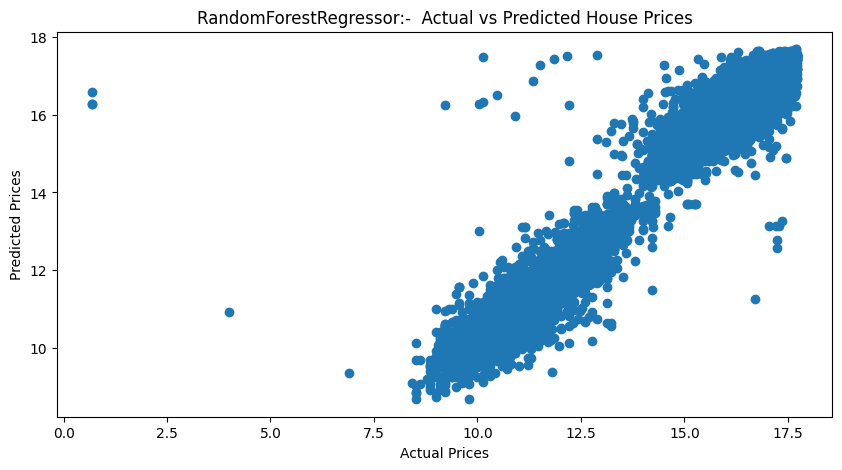

In [156]:

plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("RandomForestRegressor:-  Actual vs Predicted House Prices")
plt.show()

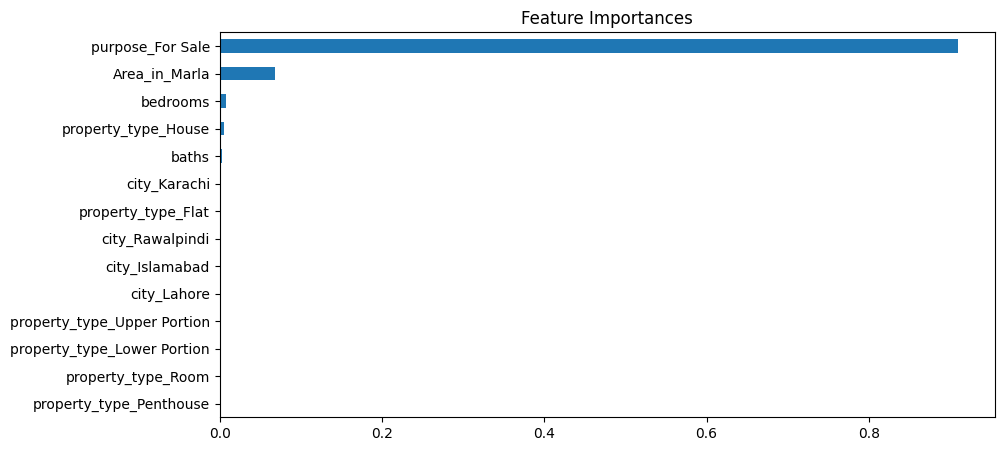

In [157]:
feature_importances = pd.Series(model.feature_importances_, index=x_train.columns)
feature_importances.sort_values().plot(kind='barh', figsize=(10,5))
plt.title("Feature Importances")
plt.show()

In [158]:
import joblib

# Save the model
joblib.dump(model, 'house_price_model.pkl')

# Save the OneHotEncoder too
joblib.dump(oh, 'encoder.pkl')

['encoder.pkl']